# 1. Installing Dependencies

In [1]:
!pip install easyocr
!pip install imutils

# 1. Using Necessary Libraries

In [34]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import pytesseract

# 2. Read Image

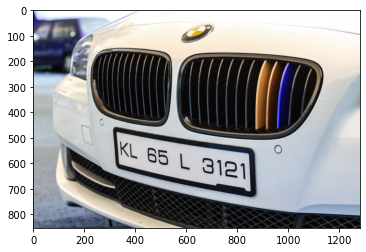

In [98]:
img = cv2.imread('images/54f9a84214f0e6ea63e03e1e2838abe4.jpg')
plt.imshow(img)

it's plotting image in BGR format

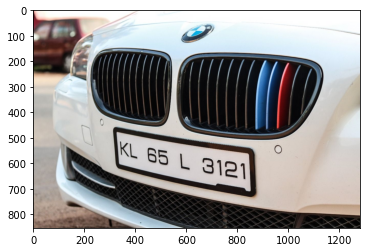

In [99]:
# let's convert it to RGB, and our image will look like
rgb_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)

# 3. Preparing Image

### i. Converting it to Gray Scale

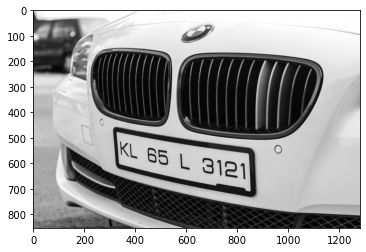

In [100]:
# Gray scale image
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray_img, cv2.COLOR_BGR2RGB))

### ii. Applying filter and finding egdes for localization

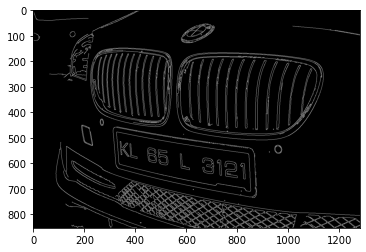

In [101]:
bfilter  = cv2.bilateralFilter(gray_img, 11,17,17) # For Noise reduction
edged = cv2.Canny(bfilter, 30,200) # edges detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

Parameters in cv2.bilateralFilter ( src, dst, d, sigmaColor,sigmaSpace, borderType = BORDER_DEFAULT ):
1. src It is the image whose is to be blurred
2. dst Destination image of the same size and type as src .
3. d Diameter of each pixel neighborhood that is used during filtering. If it is non-positive, it is computed from    sigmaSpace.
4. sigmaColor Filter sigma in the color space. A larger value of the parameter means that farther colors within the pixel neighborhood will be mixed together, resulting in larger areas of semi-equal color.
5. sigmaSpace Filter sigma in the coordinate space. A larger value of the parameter means that farther pixels will influence each other as long as their colors are close enough. When d>0, it specifies the neighborhood size regardless of sigmaSpace. Otherwise, d is proportional to sigmaSpace.
6. borderType border mode used to extrapolate pixels outside of the image

Parameters in cv2.Canny(image, threshold1, threshold2, apertureSize, L2gradient): It returns Grayscale edge detected image.
1. image: Source/Input image of n-dimensional array.
2. threshold1: It is the High threshold value of intensity gradient.
3. threshold2: It is the Low threshold value of intensity gradient.
4. apertureSize: Order of Kernel(matrix) for the Sobel filter. Its default value is (3 x 3), and its value should be odd between 3 and 7. It is used for finding image gradients. Filter is used for smoothening and sharpening of an image.
5. L2gradient: This specifies the equation for finding gradient magnitude. L2gradient is of boolean type, and its default value is False.

# 4. Find outline, apply mask, and cropping image

In [102]:
# Finding keypoints
keypoints = cv2.findContours(edged.copy(),cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
keypoints

([array([[[854, 851]],
  
         [[853, 852]],
  
         [[852, 852]],
  
         [[853, 852]],
  
         [[854, 851]],
  
         [[855, 851]],
  
         [[856, 852]],
  
         [[855, 851]]], dtype=int32),
  array([[[857, 850]],
  
         [[859, 852]],
  
         [[859, 851]],
  
         [[858, 850]]], dtype=int32),
  array([[[794, 850]],
  
         [[795, 851]],
  
         [[794, 852]],
  
         [[793, 852]],
  
         [[792, 851]],
  
         [[793, 852]],
  
         [[794, 852]],
  
         [[795, 851]],
  
         [[796, 852]],
  
         [[796, 851]],
  
         [[795, 850]]], dtype=int32),
  array([[[920, 849]],
  
         [[921, 850]],
  
         [[922, 850]],
  
         [[924, 852]],
  
         [[922, 850]],
  
         [[921, 850]]], dtype=int32),
  array([[[759, 849]],
  
         [[759, 852]]], dtype=int32),
  array([[[628, 849]],
  
         [[629, 849]],
  
         [[630, 850]],
  
         [[629, 851]],
  
         [[628, 851]],
  
    

In [103]:
outlines = imutils.grab_contours(keypoints)
#print(outlines)
outlines = sorted(outlines, key = cv2.contourArea, reverse = True)[:10]
print(outlines)

[array([[[ 721,  166]],

       [[ 720,  167]],

       [[ 684,  167]],

       [[ 683,  168]],

       [[ 665,  168]],

       [[ 664,  169]],

       [[ 656,  169]],

       [[ 655,  170]],

       [[ 648,  170]],

       [[ 647,  171]],

       [[ 642,  171]],

       [[ 641,  172]],

       [[ 637,  172]],

       [[ 636,  173]],

       [[ 633,  173]],

       [[ 632,  174]],

       [[ 629,  174]],

       [[ 628,  175]],

       [[ 626,  175]],

       [[ 625,  176]],

       [[ 623,  176]],

       [[ 622,  177]],

       [[ 620,  177]],

       [[ 619,  178]],

       [[ 617,  178]],

       [[ 615,  180]],

       [[ 613,  180]],

       [[ 612,  181]],

       [[ 611,  181]],

       [[ 610,  182]],

       [[ 609,  182]],

       [[ 608,  183]],

       [[ 607,  183]],

       [[ 606,  184]],

       [[ 605,  184]],

       [[ 603,  186]],

       [[ 602,  186]],

       [[ 597,  191]],

       [[ 596,  191]],

       [[ 589,  198]],

       [[ 589,  199]],

       [[ 586, 

In [104]:
location = None
for outline in outlines:
    approx = cv2.approxPolyDP(outline, 10, True)
    if len(approx) == 4:
        location = approx
        break


In [105]:
location

array([[[327, 477]],

       [[341, 604]],

       [[851, 708]],

       [[841, 561]]], dtype=int32)

### ii. Masking

In [106]:
mask = np.zeros(gray_img.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255,-1)
new_image = cv2.bitwise_and(img,img, mask = mask)

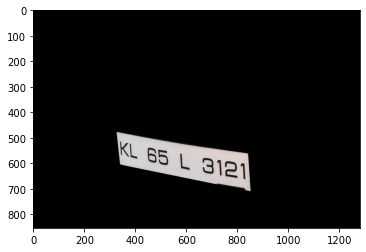

In [107]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [111]:
(x,y) = np.where(mask == 255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_img = gray_img[x1:x2,y1:y2]

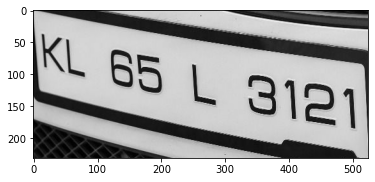

In [112]:
plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))